![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [7]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!
#load the dataset in pandas
df = pd.read_csv("dataset/car_insurance.csv")
df.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


#### Explanatory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

<AxesSubplot:>

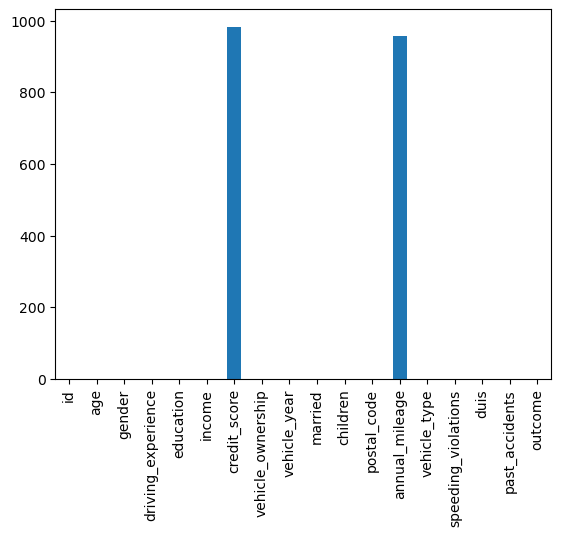

In [9]:
#check for null values
df.isna().sum()
df[df["credit_score"].isna()]
df[df["annual_mileage"].isna()]
#plot the missing values
missing_values = df.isna().sum()
missing_values.plot(kind = "bar")



In [10]:
#impute the missing values with the mean.
#credit score column
avg_credit_score = df["credit_score"].mean()
df.loc[df["credit_score"].isna(), "credit_score"] = avg_credit_score
#annual mileage column
avg_mileage = df["annual_mileage"].mean()
df.loc[df["annual_mileage"].isna(), "annual_mileage"] = avg_mileage
df.isna().sum()


id                     0
age                    0
gender                 0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

In [11]:
# subset the columns of interest
subset_df = df.drop(columns = "id", axis = 1)

#### Model all the columns with the outcome column to indentify the best model of determining whether the customer will put in a claim

In [12]:
#create an empty list that will the store the values from the fitted model and a list for the confusion matrix.
model_values = []
conf_matrix = []

#loop through each column fitting the data against the outcome column
for col in subset_df.columns:
    if col!="outcome":
        print(col)
        model = logit(f"outcome ~ {col}",data = subset_df).fit()
        model_values.append(model)
                
        confusion_matrix = model.pred_table()
        conf_matrix.append(confusion_matrix)
        
    else: pass

print(model_values)
print(conf_matrix)


age
Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
gender
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
driving_experience
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
education
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
income
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
credit_score
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
vehicle_ownership
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
vehicle_year
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
married
Optimization terminated successfully.
         Current function value: 0.586659
     

#### We know measure the result obtained by accuracy to identify the best performing model for predicting the claims

In [13]:
#create a list to store the accuracy values
accuracies= []
#get the required parameters for calculating accuracy
for i in conf_matrix:
    TN = i[0][0]
    TP = i[1][1]
    FN = i[1][0]
    FP = i[0][1]
    #calculate the accuracy of each of the models
    accuracy = (TN +TP)/ (TN + TP + FP +FN)
    accuracies.append(accuracy)
    
#get the most accurate model
best_accuracy = max(accuracies)
best_accuracy
#find the feature with the largest accuracy
best_feature = subset_df.columns[accuracies.index(max(accuracies))]  
best_feature

'driving_experience'

#### Store the results as a dataframe

In [14]:
best_feature_df = pd.DataFrame({
    "best_feature":best_feature,
    "best_accuracy":best_accuracy,
}, index = [0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771


In [15]:
df[["driving_experience","outcome"]].head()
# driving_exp_vs_outcome = logit("outcome ~ driving_experience", data = df).fit()
# driving_exp_vs_outcome.summary()


# import seaborn as sns
# sns.scatterplot(
#     x = "driving_experience",
#     y = "outcome",
#     data = df
# )


,driving_experience,outcome
0,0-9y,0.0
1,0-9y,1.0
2,0-9y,0.0
3,0-9y,0.0
4,10-19y,1.0


## CONCLUSION

### We can conclude that the driving experience column provides the best fit for determining whether a customer will make an insuarance claim during the policy period. 